In [2]:
import numpy as np
# from scipy.special import binom
from scipy.special import genlaguerre
# from scipy.special import hyp1f1
import matplotlib.pyplot as plt
# x = np.arange(-1.0, 1.0, 0.01)
# np.allclose(genlaguerre(3, 3)(x), binom(6, 3) * hyp1f1(-3, 4, x))
import math

pi=math.pi
sign = lambda x: math.copysign(1, x) # two will work

def w_n_n(x, p, w, n):
    return (1/pi)*((-1)**(n))*np.exp(-(w*x**2 + p**2/w))*genlaguerre(n,0)(2*p**2/w + 2*w*x**2)

# def w_nm1_nm1(x,n):
#     if n == 0:
#         return  0
#     else:
#         return (1/pi)*((-1)**(n-1))*np.exp(-0.5*abs(x)**2)*genlaguerre(n-1,0)(abs(x)*abs(x)) 

# def w_nm1_n(x,n):
#     if n == 0:
#         return 0
#     else:
#         return (1/(pi*np.sqrt(n)))*((-1)**(n-1))*x*np.exp(-0.5*abs(x)**2)*genlaguerre(n-1,1)(abs(x)*abs(x))    


# def WDF(x, n, delta, lbda, beta):
#     return   (1/2**(1-delta))*(w_n_n(x, n) + w_nm1_nm1(x,n) - 2*lbda*beta*np.real(w_nm1_n(x,n)))    

def constA(n, epsilon, deltaS):
    return sign(n)*np.sqrt(abs(epsilon)+sign(n)*deltaS)/np.sqrt(2*abs(epsilon))

def constB(n, epsilon, deltaS):
    return sign(n)*np.sqrt(abs(epsilon)-sign(n)*deltaS)/np.sqrt(2*abs(epsilon))



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
n = 1
ksi = 1
h = 1
e = 1

vF = 1/(2.18)
B = 0.25



w = vF*np.sqrt(2*e*B/h)

deltaSO = 2
deltaZ = 1
s = 1

deltaS = 0.5*(deltaZ - s*ksi*deltaSO)

In [6]:

if n==0:
    A = (1-ksi)/2
    B = (1+ksi)/2
    epsilon = -ksi*deltaS
else:
    epsilon = sign(n)*np.sqrt(abs(n)*w**2 + deltaS**2)
    A = constA(n,epsilon,deltaS)
    B = constB(n,epsilon,deltaS)




n_p = abs(n) - (1+ksi)/2
n_m = abs(n) - (1-ksi)/2

#print(deltaS, epsilon, constA(1,1.5,0.5), B, n_p, n_m)

arrayX = np.arange(-10.0, 10.01, 0.01)
px=np.arange(-10.0, 10.01, 0.01)

y, Py = np.meshgrid(arrayX, px)


if n ==0:
    WDF = (B**2)*w_n_n(y, Py, w, n_m)
else:
    WDF = (A**2)*w_n_n(y, Py, w, n_p) + (B**2)*w_n_n(y, Py, w, n_m)


print(WDF.shape)

print('WDF norm: ' + str(np.trapz(arrayX, np.trapz(px,WDF))))

print('WDF norm: ' + str(np.sqrt(np.trapz(arrayX, np.trapz(px,abs(WDF)**2)))))

(2001, 2001)
WDF norm: 0.9999999999968079
WDF norm: 0.3682184317694194


In [7]:
def renyiEntropy(x, p, matrix, alpha):
    L2norm = np.sqrt(np.trapz(p, np.trapz(x, abs(matrix)**2)))
    pdf = (matrix)#/L2norm
    entropy = (1/(1-alpha))*np.log(((2*pi)**alpha)*(np.trapz(p, np.trapz(x, abs(pdf)**2**alpha))))
    del L2norm, pdf
    return entropy

In [86]:
deltaZarray = np.arange(-3, 3, 0.05)

renyiArray_np_su = []
renyiArray_nm_su = []

renyiArray_np_sd = []
renyiArray_nm_sd = []


arrayX =np.arange(-10.0, 10.01, 0.01)
px=np.arange(-10.0, 10.01, 0.01)

y, Py = np.meshgrid(arrayX, px)

ksi = 1
e=1
h=1
vF = 1#/(2.18)
B = 0.01
N=1

w = vF*np.sqrt(2*e*B/h)

renyiIndex = 5/2

for i in range(len(deltaZarray)):  
############################################################################ 
    n = 1*N
    s = 1
    deltaSO = 1
    deltaZ = deltaZarray[i]

    deltaS = 0.5*(deltaZ - s*ksi*deltaSO)

    epsilon = sign(n)*np.sqrt(abs(n)*w**2 + deltaS**2)
    A = constA(n,epsilon,deltaS)
    B = constB(n,epsilon,deltaS)

    n_p = abs(n) - (1+ksi)/2
    n_m = abs(n) - (1-ksi)/2

    #print('Spin up electron: ',n_p, n_m)
    if n ==0:
        WDF = (B**2)*w_n_n(y, Py, w, n_m)
    else:
        WDF = (A**2)*w_n_n(y, Py, w, n_p) + (B**2)*w_n_n(y, Py, w, n_m)

    renyiArray_np_su.append(renyiEntropy(arrayX, px, WDF, renyiIndex)) 
############################################################################
    n = -1*N
    s = 1
    deltaSO = 1
    deltaZ = deltaZarray[i]

    deltaS = 0.5*(deltaZ - s*ksi*deltaSO)

    epsilon = sign(n)*np.sqrt(abs(n)*w**2 + deltaS**2)
    A = constA(n,epsilon,deltaS)
    B = constB(n,epsilon,deltaS)

    n_p = abs(n) - (1+ksi)/2
    n_m = abs(n) - (1-ksi)/2

    #print('Spin up hole: ',n_p, n_m)
    if n ==0:
        WDF = (B**2)*w_n_n(y, Py, w, n_m)
    else:
        WDF = (A**2)*w_n_n(y, Py, w, n_p) + (B**2)*w_n_n(y, Py, w, n_m)

    renyiArray_nm_su.append(renyiEntropy(arrayX, px, WDF, renyiIndex))
###########################################################################
    n = 1*N
    s = -1
    deltaSO = 1
    deltaZ = deltaZarray[i]

    deltaS = 0.5*(deltaZ - s*ksi*deltaSO)

    epsilon = sign(n)*np.sqrt(abs(n)*w**2 + deltaS**2)
    A = constA(n,epsilon,deltaS)
    B = constB(n,epsilon,deltaS)

    n_p = abs(n) - (1+ksi)/2
    n_m = abs(n) - (1-ksi)/2

    #print('Spin down electron: ',n_p, n_m)
    if n ==0:
        WDF = (B**2)*w_n_n(y, Py, w, n_m)
    else:
        WDF = (A**2)*w_n_n(y, Py, w, n_p) + (B**2)*w_n_n(y, Py, w, n_m)

    renyiArray_np_sd.append(renyiEntropy(arrayX, px, WDF, renyiIndex)) 
############################################################################
    n = -1*N
    s = -1
    deltaSO = 1
    deltaZ = deltaZarray[i]

    deltaS = 0.5*(deltaZ - s*ksi*deltaSO)

    epsilon = sign(n)*np.sqrt(abs(n)*w**2 + deltaS**2)
    A = constA(n,epsilon,deltaS)
    B = constB(n,epsilon,deltaS)

    n_p = abs(n) - (1+ksi)/2
    n_m = abs(n) - (1-ksi)/2

    #print('Spin down hole: ',n_p, n_m)
    if n ==0:
        WDF = (B**2)*w_n_n(y, Py, w, n_m)
    else:
        WDF = (A**2)*w_n_n(y, Py, w, n_p) + (B**2)*w_n_n(y, Py, w, n_m)

    renyiArray_nm_sd.append(renyiEntropy(arrayX, px, WDF, renyiIndex))      

In [87]:
from operator import add
renyi_spin_up = list(map(add, renyiArray_np_su, renyiArray_nm_su)) 
renyi_spin_down = list(map(add, renyiArray_np_sd, renyiArray_nm_sd)) 

In [88]:
C1 = (np.gradient(deltaZarray, renyi_spin_up)*np.gradient(deltaZarray, renyi_spin_down))

In [84]:
C2 =  (np.gradient(deltaZarray, renyi_spin_up)*np.gradient(deltaZarray, renyi_spin_down))

In [80]:
C3 = (np.gradient(deltaZarray, renyi_spin_up)*np.gradient(deltaZarray, renyi_spin_down))

In [101]:
C1_new = np.delete(C1, C1.argmax())
C1_new = np.delete(C1_new, C1.argmin())

C2_new = np.delete(C2, C2.argmax())
C2_new = np.delete(C2_new, C2.argmin())

C3_new = np.delete(C3, C3.argmax())
C3_new = np.delete(C3_new, C3.argmin())

deltaZ_new = np.delete(deltaZarray, -1)
deltaZ_new = np.delete(deltaZ_new, 1)

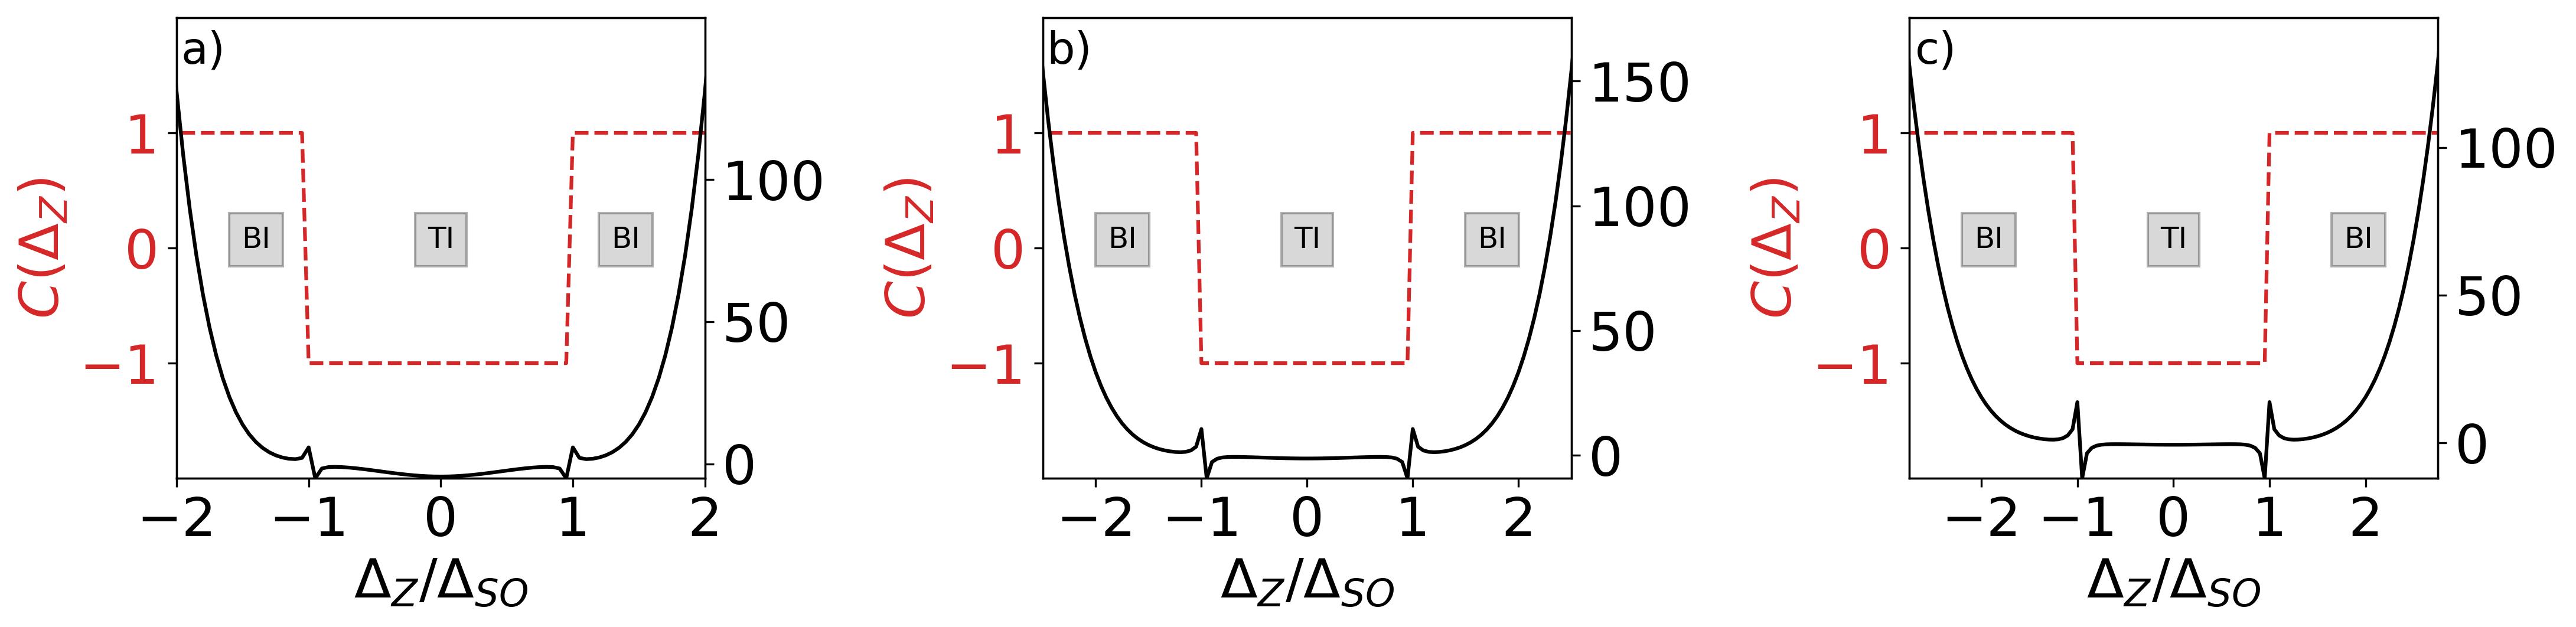

In [158]:
from matplotlib.pyplot import savefig

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams.update({'font.size': 22})



fig, (ax1, ax2, ax3)= plt.subplots(figsize=(15, 4), ncols=3)


plt.subplot(1,3,1)
ax1.plot(deltaZarray, np.sign(C1), color = 'tab:red', linestyle = 'dashed')
ax1.set_xlabel('$\Delta_Z/\Delta_{SO}$')
ax1.set_ylabel('$C(\Delta_Z)$', color = 'tab:red') 
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.set_xticks([-2,-1,0,1,2])
ax1.set_yticks([-1,0,1])

ax1.text(0.05,0.9, "a)", size=18, ha="center",
         transform=ax1.transAxes)#, bbox={"facecolor":"grey", "alpha":0.3, "pad":5})

ax1.text(0.15,0.5, "BI", size=12, ha="center",
         transform=ax1.transAxes, bbox={"facecolor":"grey", "alpha":0.3, "pad":5})

ax1.text(0.5,0.5, "TI", size=12, ha="center",
         transform=ax1.transAxes, bbox={"facecolor":"grey", "alpha":0.3, "pad":5})

ax1.text(0.85,0.5, "BI", size=12, ha="center",
         transform=ax1.transAxes, bbox={"facecolor":"grey", "alpha":0.3, "pad":5})
#plt.ylabel(r'${S}_{5/2}^{1, s}$')

ax1p = ax1.twinx()
ax1p.plot(deltaZ_new,C1_new, 'k-')#, 'r.', deltaZarray,renyiArray_np_sd, 'b.')

lims = ax1.get_xlim()
i = np.where( (deltaZarray > lims[0]) &  (deltaZarray < lims[1]) )[0]
ax1p.set_ylim( C1_new[i].min(), C1_new[i].max() )
ax1p.set_yticks([0,50,100])

plt.subplot(1,3,2)

ax2.plot(deltaZarray, np.sign(C2), color = 'tab:red', linestyle = 'dashed')
ax2.set_xlabel('$\Delta_Z/\Delta_{SO}$')
ax2.set_ylabel('$C(\Delta_Z)$', color = 'tab:red') 
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_xlim(-2.5,2.5)
ax2.set_ylim(-2,2)
ax2.set_yticks([-1,0,1])
ax2.set_xticks([-2,-1,0,1,2])

ax2.text(0.05,0.9, "b)", size=18, ha="center",
         transform=ax2.transAxes)#, bbox={"facecolor":"grey", "alpha":0.3, "pad":5})

ax2.text(0.15,0.5, "BI", size=12, ha="center",
         transform=ax2.transAxes, bbox={"facecolor":"grey", "alpha":0.3, "pad":5})

ax2.text(0.5,0.5, "TI", size=12, ha="center",
         transform=ax2.transAxes, bbox={"facecolor":"grey", "alpha":0.3, "pad":5})

ax2.text(0.85,0.5, "BI", size=12, ha="center",
         transform=ax2.transAxes, bbox={"facecolor":"grey", "alpha":0.3, "pad":5})
#plt.ylabel(r'${S}_{5/2}^{1, s}$')

ax2p = ax2.twinx()

ax2p.plot(deltaZ_new,C2_new, 'k-')#, deltaZarray,renyiArray_nm_sd, 'b.')

lims = ax2.get_xlim()
i = np.where( (deltaZarray > lims[0]) &  (deltaZarray < lims[1]) )[0]
ax2p.set_ylim( C2_new[i].min(), C2_new[i].max() )

#plt.ylabel(r'${S}_{5/2}^{-1, s}$')
#plt.tight_layout()

plt.subplot(1,3,3)

ax3.plot(deltaZarray, np.sign(C3), color = 'tab:red', linestyle = 'dashed')
ax3.set_xlabel('$\Delta_Z/\Delta_{SO}$')
ax3.set_ylabel('$C(\Delta_Z)$', color = 'tab:red') 
ax3.tick_params(axis='y', labelcolor='tab:red')
ax3.set_xlim(-2.75,2.75)
ax3.set_ylim(-2,2)
ax3.set_yticks([-1,0,1])
ax3.set_xticks([-2,-1,0,1,2])

ax3.text(0.05,0.9, "c)", size=18, ha="center",
         transform=ax3.transAxes)#, bbox={"facecolor":"grey", "alpha":0.3, "pad":5})

ax3.text(0.15,0.5, "BI", size=12, ha="center",
         transform=ax3.transAxes, bbox={"facecolor":"grey", "alpha":0.3, "pad":5})

ax3.text(0.5,0.5, "TI", size=12, ha="center",
         transform=ax3.transAxes, bbox={"facecolor":"grey", "alpha":0.3, "pad":5})

ax3.text(0.85,0.5, "BI", size=12, ha="center",
         transform=ax3.transAxes, bbox={"facecolor":"grey", "alpha":0.3, "pad":5})
#plt.ylabel(r'${S}_{5/2}^{1, s}$')

ax3p = ax3.twinx()

ax3p.plot(deltaZ_new,C3_new, 'k-')#, deltaZarray,renyiArray_nm_sd, 'b.')

lims = ax3.get_xlim()
i = np.where( (deltaZarray > lims[0]) &  (deltaZarray < lims[1]) )[0]
ax3p.set_ylim( C3_new[i].min(), C3_new[i].max() )

fig.tight_layout()
#plt.vlines(x=-1,ymin=min(renyi_spin_down)-0.5,ymax=max(renyi_spin_down)+0.1,color = 'b', linestyles = 'dashed')
#plt.vlines(x=1,ymin=min(renyi_spin_up)-0.5,ymax=max(renyi_spin_up)+0.1,color = 'r', linestyles = 'dashed')

# plt.subplot(1,4,4)
# plt.plot(deltaZarray, np.sign(np.gradient(deltaZarray, renyi_spin_up)*np.gradient(deltaZarray, renyi_spin_down)))
# plt.xlabel('$\Delta_Z/\Delta_{SO}$')
# plt.ylabel('$C$')

savefig('renyi_topo_charge.png', transparent=True, bbox_inches = "tight")

In [62]:

from matplotlib.pyplot import savefig

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

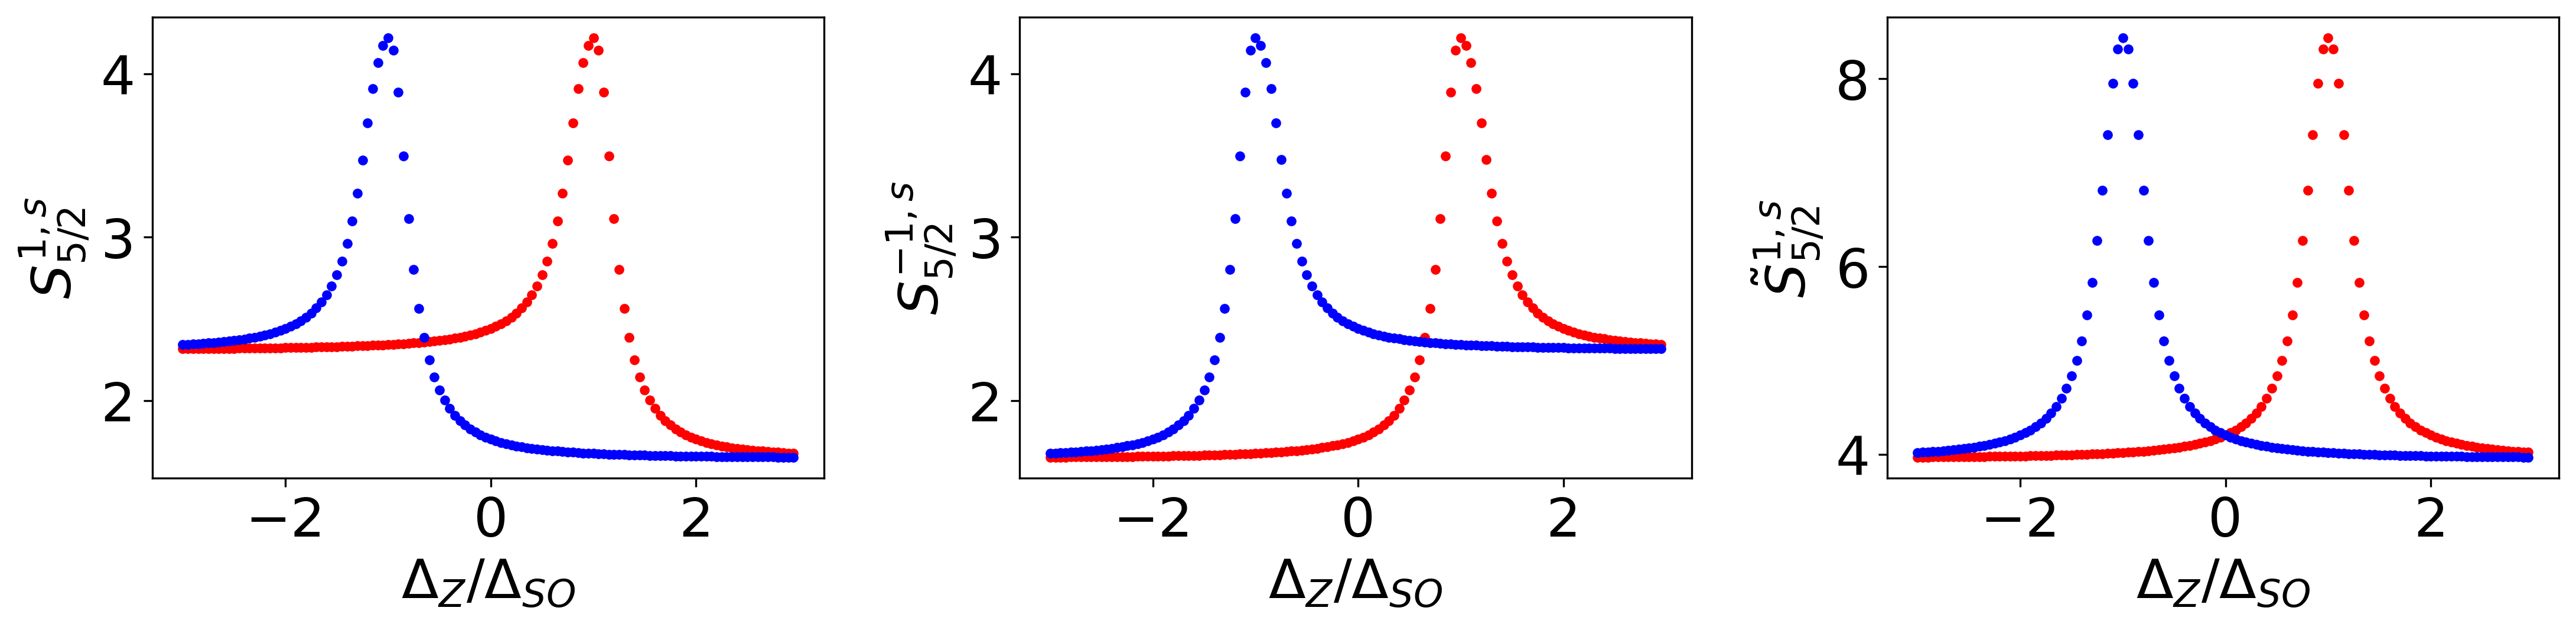

In [89]:
plt.rcParams.update({'font.size': 22})

fig = plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(deltaZarray,renyiArray_np_su, 'r.', deltaZarray,renyiArray_np_sd, 'b.')
plt.xlabel('$\Delta_Z/\Delta_{SO}$')
plt.ylabel(r'${S}_{5/2}^{1, s}$')
plt.tight_layout()

plt.subplot(1,3,2)
plt.plot(deltaZarray,renyiArray_nm_su, 'r.', deltaZarray,renyiArray_nm_sd, 'b.')
plt.xlabel('$\Delta_Z/\Delta_{SO}$')
plt.ylabel(r'${S}_{5/2}^{-1, s}$')
plt.tight_layout()

plt.subplot(1,3,3)
plt.plot(deltaZarray,renyi_spin_up, 'r.', deltaZarray,renyi_spin_down, 'b.')
plt.xlabel('$\Delta_Z/\Delta_{SO}$')
plt.ylabel(r'$\tilde{S}_{5/2}^{1, s}$')
plt.tight_layout()
#plt.vlines(x=-1,ymin=min(renyi_spin_down)-0.5,ymax=max(renyi_spin_down)+0.1,color = 'b', linestyles = 'dashed')
#plt.vlines(x=1,ymin=min(renyi_spin_up)-0.5,ymax=max(renyi_spin_up)+0.1,color = 'r', linestyles = 'dashed')

# plt.subplot(1,4,4)
# plt.plot(deltaZarray, np.sign(np.gradient(deltaZarray, renyi_spin_up)*np.gradient(deltaZarray, renyi_spin_down)))
# plt.xlabel('$\Delta_Z/\Delta_{SO}$')
# plt.ylabel('$C$')

savefig('renyi_n1.png', transparent=True, bbox_inches = "tight")

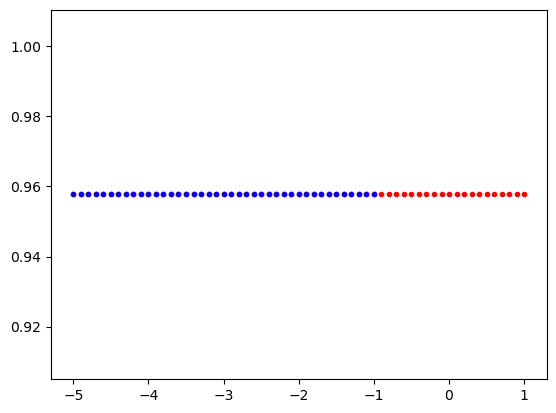

In [36]:
plt.plot(deltaZarray,renyiArray, 'r.', deltaZarray,renyiArray_sm, 'b.')

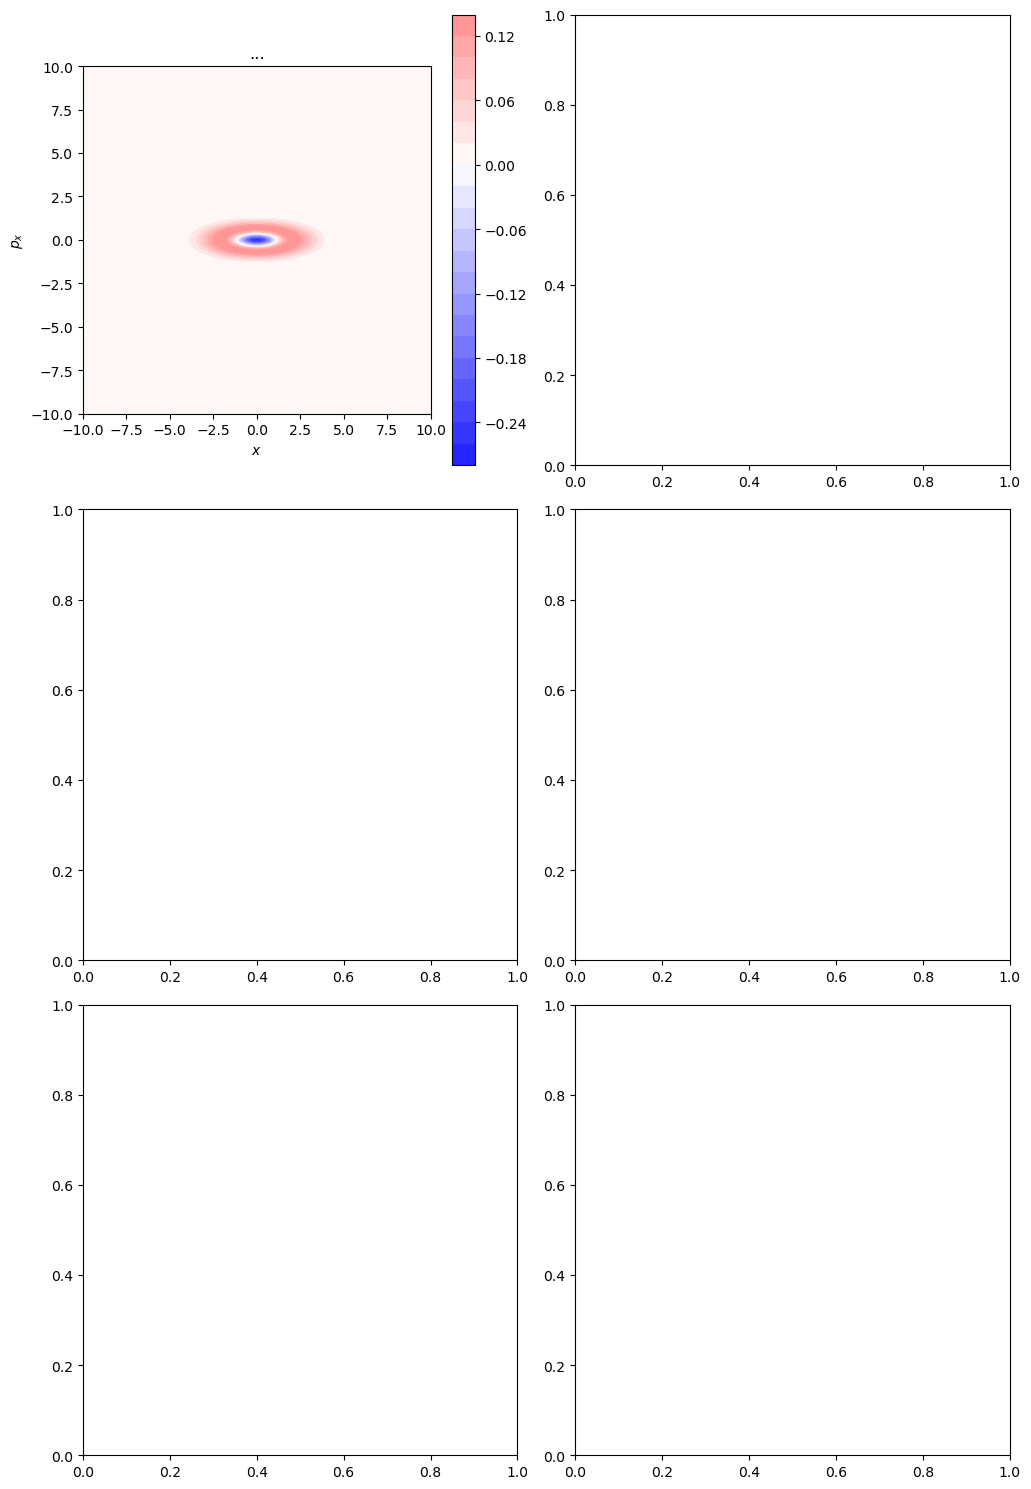

In [85]:
fig, axs = plt.subplots(3, 2, figsize=(10,15), facecolor = 'w', edgecolor = 'k')
axs = axs.ravel()
fig.tight_layout()

figA = axs[0].contourf(arrayX, px, WDF, levels = 20, cmap = 'bwr', vmax = 1/pi, vmin = -1/pi) 
axs[0].set(xlabel='$x$', ylabel = '$p_x$')
#axs[0].ylabel('$p_x$') 
fig.colorbar(figA, ax = axs[0])
axs[0].set_title('...')# WDF norm: ' + str(np.trapz(s, np.trapz(ksi,WDF(x,n,delta, lbda, beta1)))))
axs[0].set_aspect('equal')